<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/InverseLinkPredcition/blob/main/Sparcification_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load edge list and features
edges_list_filename = 'sparsified_graph_edges_0.98.csv'
summary_data_filename = '1M1L3D_summary.csv'

edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
summary_data = pd.read_csv(summary_data_filename)

# Filter summary data based on edge list
node_labels = np.unique(np.concatenate((edges_list['source'], edges_list['target'])))

summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
summary_data_filtered['PLD_category'] = pd.cut(summary_data_filtered['Pore Limiting Diameter'], bins=[-np.inf, 2.4, 4.5, 8, np.inf], labels=['nonporous', 'small pore', 'medium pore', 'large pore'])
labels = pd.get_dummies(summary_data_filtered['PLD_category']).values
# Calculate percentage of each class label
class_labels = summary_data_filtered['PLD_category']
class_counts = class_labels.value_counts(normalize=True) * 100

# Plot percentage of each class label
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Each Class Label')
plt.xlabel('Class Label')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

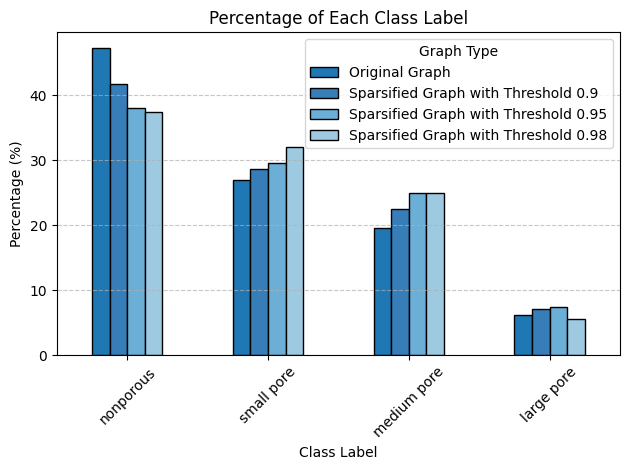

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the summary data file
summary_data_filename = '1M1L3D_summary.csv'

# Load summary data
summary_data = pd.read_csv(summary_data_filename)

# Define the dictionary of edge files
edge_files = {
    'Original Graph': 'edges_list_0.8_Full.csv',
    'Sparsified Graph with Threshold 0.9': 'sparsified_graph_edges_0.9.csv',
    'Sparsified Graph with Threshold 0.95': 'sparsified_graph_edges_0.95.csv',
    'Sparsified Graph with Threshold 0.98': 'sparsified_graph_edges_0.98.csv'
}

# Function to process each edge file
def process_edge_file(edge_file):
    # Load edge list
    edges_list = pd.read_csv(edge_file, header=None, names=['source', 'target', 'weight'], delimiter=' ')

    # Filter summary data based on edge list
    node_labels = np.unique(np.concatenate((edges_list['source'], edges_list['target'])))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    summary_data_filtered['PLD_category'] = pd.cut(summary_data_filtered['Pore Limiting Diameter'], bins=[-np.inf, 2.4, 4.5, 8, np.inf], labels=['nonporous', 'small pore', 'medium pore', 'large pore'])

    # Calculate percentage of each class label
    class_labels = summary_data_filtered['PLD_category']
    class_counts = class_labels.value_counts(normalize=True) * 100

    return class_counts

# Combine results from all edge files
combined_class_counts = pd.DataFrame()

for label, filename in edge_files.items():
    class_counts = process_edge_file(filename)
    combined_class_counts[label] = class_counts

# Define a custom color palette within the blue spectrum
colors = ['#1f77b4', '#377eb8', '#6baed6', '#9ecae1']

# Plot percentage of each class label with custom colors
plt.figure(figsize=(10, 6))
combined_class_counts.plot(kind='bar', edgecolor='black', color=colors)
plt.title('Percentage of Each Class Label')
plt.xlabel('Class Label')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Graph Type')
plt.tight_layout()
plt.show()


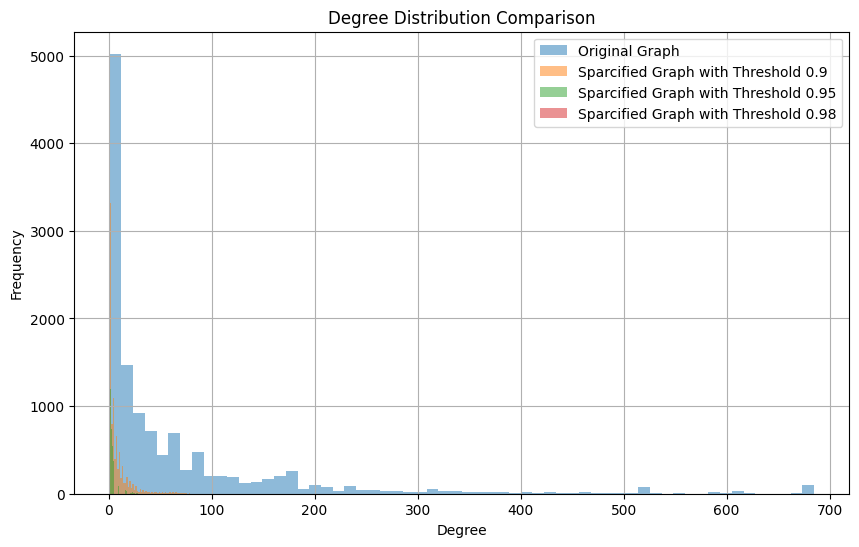

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Degree'], bins=60, alpha=0.5, label=label)

plt.title('Degree Distribution Comparison')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



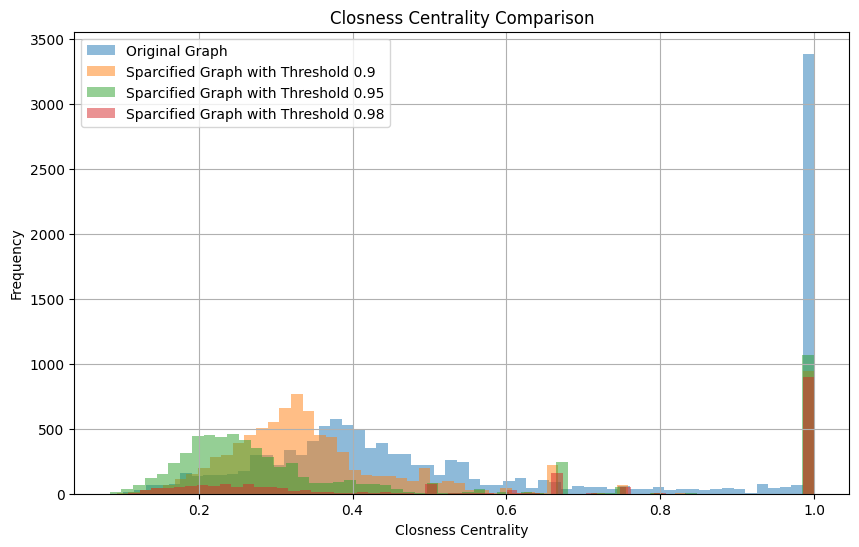

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['closnesscentrality'], bins=60, alpha=0.5, label=label)

plt.title('Closness Centrality Comparison')
plt.xlabel('Closness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

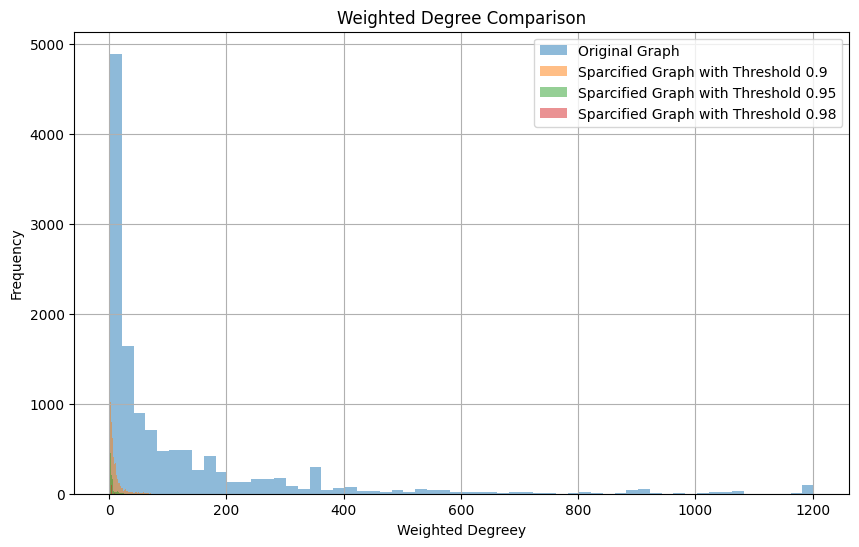

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Weighted Degree'], bins=60, alpha=0.5, label=label)

plt.title('Weighted Degree Comparison')
plt.xlabel('Weighted Degreey')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

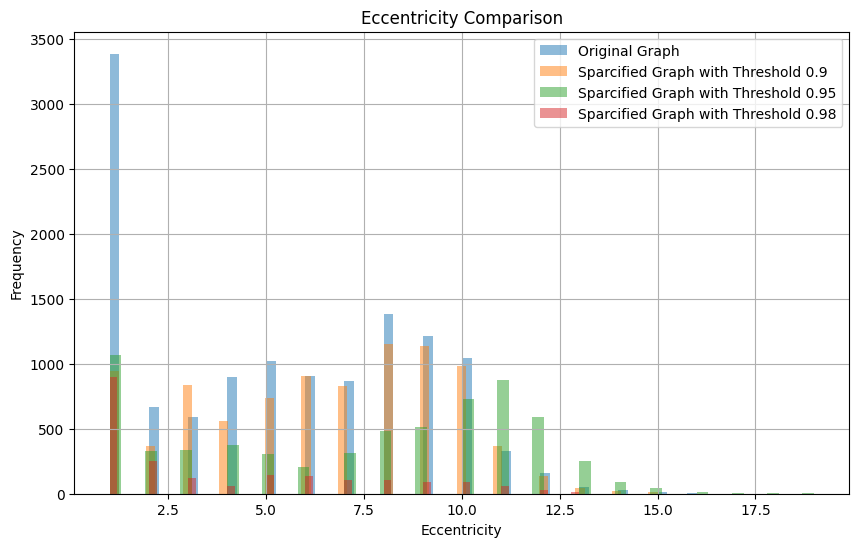

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Eccentricity'], bins=60, alpha=0.5, label=label)

plt.title('Eccentricity Comparison')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

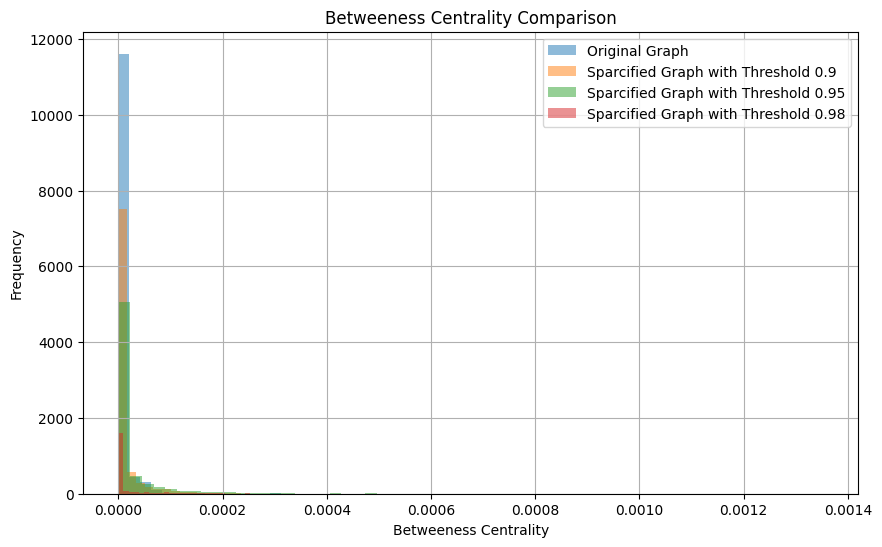

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['betweenesscentrality'], bins=60, alpha=0.5, label=label)

plt.title('Betweeness Centrality Comparison')
plt.xlabel('Betweeness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

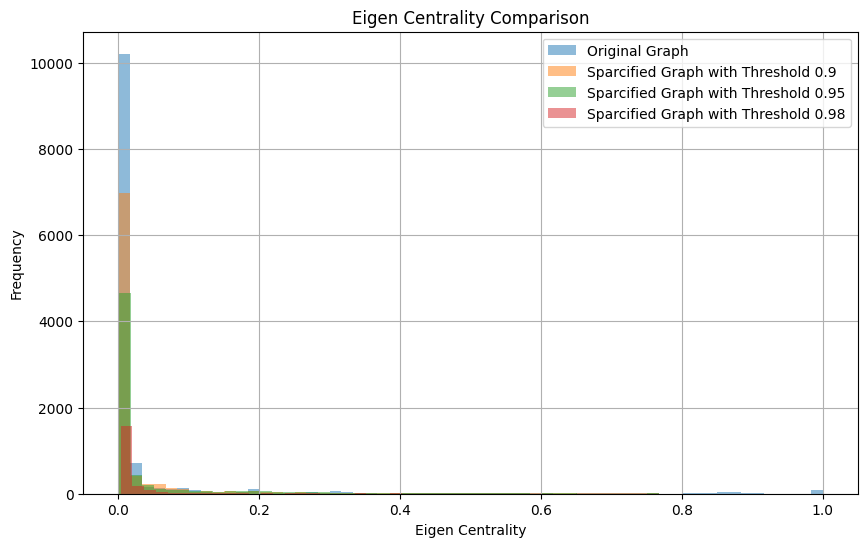

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['eigencentrality'], bins=60, alpha=0.5, label=label)

plt.title('Eigen Centrality Comparison')
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/InverseLinkPredcition')

Mounted at /content/drive
